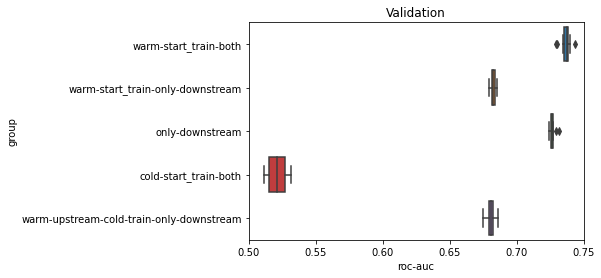

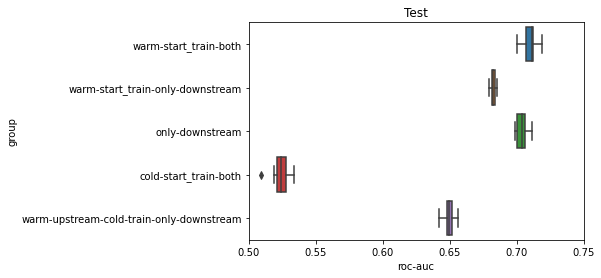

Sample Sizes
warm-start_train-both: 14
warm-start_train-only-downstream: 14
only-downstream: 15
cold-start_train-both: 8
warm-upstream-cold-train-only-downstream: 15


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# comparisson:
# a: both_stages_being_trained_warm_start
# b: warm start, only downstream being trained
# c: only downsteam

# warm start both stages train
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V5-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    a = pickle.load(handle)

# warm start, only downstream being trained
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V6-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    b = pickle.load(handle)

# Only downstream classification
with open('/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    c = pickle.load(handle)

# cold start both stages train
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V7-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    d = pickle.load(handle)

# cold start for downstream, upstream warm start, train only downstream
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V8-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    e = pickle.load(handle)

# validation
res_df_val = pd.concat(
    [
        pd.DataFrame({
            'roc-auc': a['validation-roc-auc'],
            'group': ['warm-start_train-both']*len(a['validation-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': b['validation-roc-auc'],
            'group': ['warm-start_train-only-downstream']*len(b['validation-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': c['validation-roc-auc'],
            'group': ['only-downstream']*len(c['validation-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': d['validation-roc-auc'],
            'group': ['cold-start_train-both']*len(d['validation-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': e['validation-roc-auc'],
            'group': ['warm-upstream-cold-train-only-downstream']*len(e['validation-roc-auc'])
            }),
    ],
    axis=0, ignore_index=True
)

# test
res_df_test = pd.concat(
    [
        pd.DataFrame({
            'roc-auc': a['test-roc-auc'],
            'group': ['warm-start_train-both']*len(a['test-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': b['validation-roc-auc'],
            'group': ['warm-start_train-only-downstream']*len(b['test-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': c['test-roc-auc'],
            'group': ['only-downstream']*len(c['test-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': d['test-roc-auc'],
            'group': ['cold-start_train-both']*len(d['test-roc-auc'])
            }),
        pd.DataFrame({
            'roc-auc': e['test-roc-auc'],
            'group': ['warm-upstream-cold-train-only-downstream']*len(e['test-roc-auc'])
            }),
    ],
    axis=0, ignore_index=True
)

sns.boxplot(data = res_df_val, x = 'roc-auc', y='group')
plt.title('Validation')
plt.xlim((0.5, 0.75))
plt.show()

sns.boxplot(data = res_df_test, x = 'roc-auc', y='group')
plt.title('Test')
plt.xlim((0.5, 0.75))
plt.show()

len_a = len(a['test-roc-auc'])
len_b = len(b['test-roc-auc'])
len_c = len(c['test-roc-auc'])
len_d = len(d['test-roc-auc'])
len_e = len(e['test-roc-auc'])

print('Sample Sizes')
print(f'warm-start_train-both: {len_a}')
print(f'warm-start_train-only-downstream: {len_b}')
print(f'only-downstream: {len_c}')
print(f'cold-start_train-both: {len_d}')
print(f'warm-upstream-cold-train-only-downstream: {len_e}')

1. warm-start_train-both: 14 observations
2. warm-start_train-only-downstream: 14 observations
3. only-downstream: 15 observations
4. cold-start_train-both: 8 observations
5. upstream-warm-downstream-cold-train-only-downstream: 15 observations
6. warm-start_train-both-impute-only-missing: 22 observations


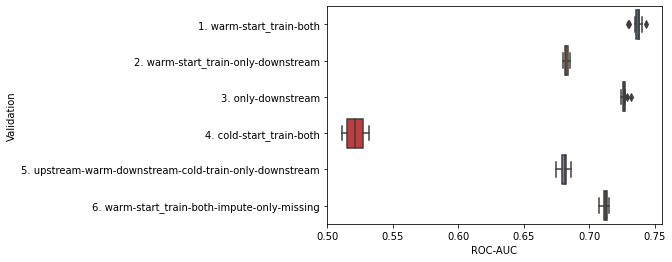

1. warm-start_train-both: 14 observations
1b. warm-start_train-both, registered: 5 observations
2. warm-start_train-only-downstream: 14 observations
3. only-downstream: 15 observations
3b. only-downstream-registered: 48 observations
5. upstream-warm-downstream-cold-train-only-downstream: 15 observations
6. warm-start_train-both-impute-only-missing: 22 observations
7. warm-start_train-both, weight 0.5 to reconstruction: 7 observations
8. warm-start_train-both, dynamic reconstruction regime: 8 observations


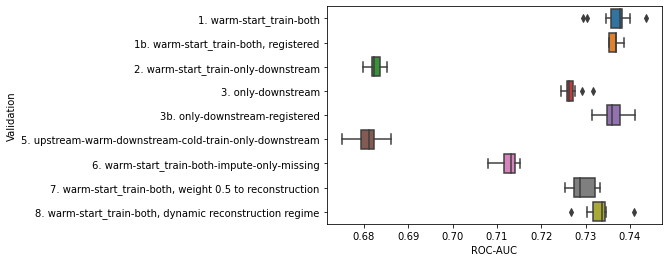

1. warm-start_train-both: 14 observations
1b. warm-start_train-both, registered: 5 observations
2. warm-start_train-only-downstream: 14 observations
3. only-downstream: 15 observations
3b. only-downstream-registered: 48 observations
5. upstream-warm-downstream-cold-train-only-downstream: 15 observations
6. warm-start_train-both-impute-only-missing: 22 observations
7. warm-start_train-both, weight 0.5 to reconstruction: 7 observations
8. warm-start_train-both, dynamic reconstruction regime: 8 observations


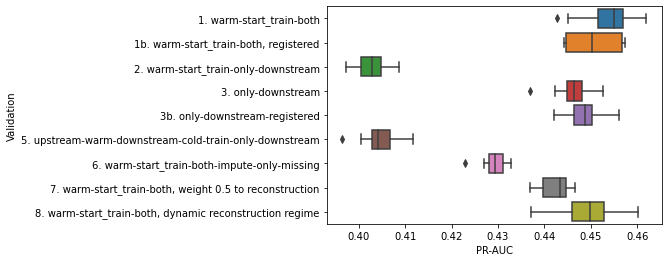

In [6]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# comparisson:
# a: both_stages_being_trained_warm_start
# b: warm start, only downstream being trained
# c: only downsteam




def plot_results(paths, names, kpi='roc-auc', show_test_as_well = False):
    KPI = kpi.upper()
    results = dict()
    # load
    for name,path in zip(names,paths):
        with open(path, 'rb') as handle:
            results[name] = pickle.load(handle)
    
    # create validation df
    validation_results_df = pd.DataFrame()
    for name in names:
        N_group=len(results[name][f'validation-{kpi}'])
        print(f'{name}: {N_group} observations')
        roc_auc_temp = results[name][f'validation-{kpi}']
        group_temp   = [name]*N_group
        df_temp      = pd.DataFrame({
            KPI: roc_auc_temp,
            'Validation': group_temp
        })
        validation_results_df = pd.concat([validation_results_df,df_temp],axis=0, ignore_index=True)
    
    # create test df
    test_results_df = pd.DataFrame()
    for name in names:
        roc_auc_temp = results[name][f'test-{kpi}']
        group_temp   = [name]*len(results[name][f'test-{kpi}'])
        df_temp      = pd.DataFrame({
            KPI: roc_auc_temp,
            'Test': group_temp
        })
        test_results_df = pd.concat([test_results_df,df_temp],axis=0, ignore_index=True)
    
    # plot
    if show_test_as_well:
        fig, axs = plt.subplots(2, sharex=True)
        sns.boxplot(data = validation_results_df, x = KPI, y='Validation', ax=axs[0])
        # axs[0].set_title('Validation')
        
        sns.boxplot(data = test_results_df, x = KPI, y='Test', ax=axs[1])
        # axs[1].set_title('Test')
        
        # plt.tight_layout()
    else:
        sns.boxplot(data = validation_results_df, x = KPI, y='Validation')
    plt.show()



paths = ['/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V5-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V6-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V7-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V8-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl',
         ]
names = ['1. warm-start_train-both',
         '2. warm-start_train-only-downstream',
         '3. only-downstream',
         '4. cold-start_train-both',
         '5. upstream-warm-downstream-cold-train-only-downstream',         
         '6. warm-start_train-both-impute-only-missing',
         ]

plot_results(paths, names)


paths = ['/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V5-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V12-registered-downstream/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V6-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V10-different-seeds-registered/best_rocauc_and_pr_auc.pkl',
        #  '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V7-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V8-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V10-different-seeds-again2/best_rocauc_and_pr_auc_combined.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V11-first-reconstruction-then-training-again/best_rocauc_and_pr_auc.pkl',
         ]
names = ['1. warm-start_train-both',
         '1b. warm-start_train-both, registered',
         '2. warm-start_train-only-downstream',
         '3. only-downstream',
         '3b. only-downstream-registered',
        #  'cold-start_train-both',
         '5. upstream-warm-downstream-cold-train-only-downstream',         
         '6. warm-start_train-both-impute-only-missing',
         '7. warm-start_train-both, weight 0.5 to reconstruction',
         '8. warm-start_train-both, dynamic reconstruction regime',
         ]

plot_results(paths, names)

plot_results(paths, names, kpi='pr-auc')

# add all of V10 failed experiments together

In [9]:
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V10-different-seeds/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    a = pickle.load(handle)
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V10-different-seeds-again/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    b = pickle.load(handle)
with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V10-different-seeds-again2/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    c = pickle.load(handle)
for k in a.keys():
    a[k] += b[k] + c[k]

with open('/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V10-different-seeds-again2/best_rocauc_and_pr_auc_combined.pkl', 'wb') as handle:
    pickle.dump(a, handle)
